<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-06 19:32:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-04-06 19:32:21 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_1         157 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_1 anaconda
    openssl:         1.1.1e-h7b6447c_0  --> 1.1.1-h7b6447c_0  anaconda
    seaborn:         0.9.0-pyh91

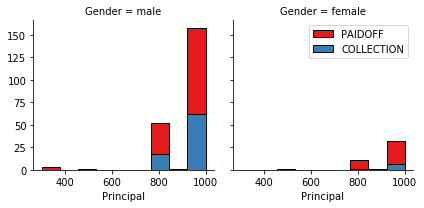

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

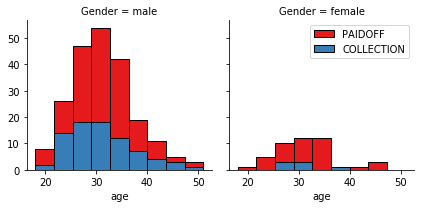

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

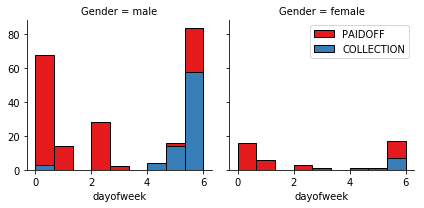

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# =================================================
#                          REVIEWER - README!!! 
- The first 2 sections of all the solutions are the same (these are generic functions that are common to all the solutions)
- I am aware that i can refactor the third section to be generic between all the different algoritms, but this refactor requires advanced python knowledge (kwargs, ect) that i am not sure that each person that takes this course posseses.
- The best k is output automatically by the code in the knn section under "Best n_neighbors"

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [65]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import itertools
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning, UndefinedMetricWarning
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-06 20:38:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-04-06 20:38:42 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [66]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
def get_training_dataframe():
    return process_dataframe('loan_train.csv')


def get_test_dataframe():
    return process_dataframe("loan_test.csv")


def scale_columns(df, col_names):
    scaled_features = df.copy()
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features


def process_dataframe(file_name):
    df = pd.read_csv(file_name)
    # Convert binary parameters to ints
    df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
    df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1], inplace=True)

    # Unnamed:0 and 0.1 seem like running indexes with small holes in them, Use as customer id
    # Drop uneeded column, validated and is the same as Unnamed: 0
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
    df = df.rename(columns={"Unnamed: 0": "id"})

    # Convert dates to objects and extract weekend and month cycles
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['effective_weekend'] = df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)
    df['effective_week'] = df['effective_date'].dt.day.apply(lambda x: int(x/7)) # Doesnt seem important, here for symmetry
    df['effective_day'] = df['effective_date'].dt.day

    df['due_date'] = pd.to_datetime(df['due_date'])
    df['due_weekend'] = df['due_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)  # Doesnt seem important, here for symmetry
    df['due_week'] = df['due_date'].dt.day.apply(lambda x: int(x/7))
    df['due_day'] = df['due_date'].dt.day

    # dates are of no use anymore, remove to reduce visual clutter (manual inspection)
    df.drop(['due_date'], axis=1, inplace=True)
    df.drop(['effective_date'], axis=1, inplace=True)

    df = pd.concat([df, pd.get_dummies(df['terms'])], axis=1)
    df = df.rename(columns={7: "ShortLoan", 15: "MidLoan", 30: "LongLoan"})

    df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
    df['education'].replace(to_replace=['High School or Below', 'college',"Bechalor","Master or Above"], value=[0, 1, 2 ,3], inplace=True)

    return df

def plot_tree(df, tree_model):
    dot_data = StringIO()
    filename = "loan_tree.png"
    feature_names = df.columns
    tree.export_graphviz(tree_model, feature_names=feature_names, out_file=dot_data, filled=True, special_characters=True, rotate=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [67]:
from sklearn.neighbors import KNeighborsClassifier

#UndefinedMetricWarning - F1 Sometimes returns 0/0 and is regarded as 0, this is ok
@ignore_warnings(category=UndefinedMetricWarning)
def generate_optimal_knn(X, y):
    cv_knn = KNeighborsClassifier()
    pipe = Pipeline([('cv_knn', cv_knn)])

    # Create a dictionary of all the parameter options
    parameters = dict(cv_knn__n_neighbors=range(1, 15),
                      cv_knn__weights=["uniform", "distance"],
                      cv_knn__metric=["euclidean", "manhattan", "chebyshev", "minkowski"])

    # Conduct Parameter Optmization With Pipeline
    clf = GridSearchCV(pipe, parameters, scoring="f1", cv=5, iid=False)
    clf.fit(X, y)

    best_n_neighbors = clf.best_estimator_.get_params()['cv_knn__n_neighbors']
    best_weights = clf.best_estimator_.get_params()['cv_knn__weights']
    best_metric = clf.best_estimator_.get_params()['cv_knn__metric']
    print('Best n_neighbors:', best_n_neighbors)
    print('Best weights:', best_weights)
    print('Best metric:', best_metric)

    # No need to train_test_split as the GridSearchCV already did this internally when finding the best params
    loan_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric)
    loan_knn.fit(X, y)
    return loan_knn

train_df = get_training_dataframe()
feature_set = ['effective_weekend',
               'Gender',
               'age',
               "Principal",
               "terms",
               'High School or Below', 'college', "Bechalor", "Master or Above",
               ]
X = train_df[feature_set].astype('float64')
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = train_df['loan_status']

loan_knn = generate_optimal_knn(X, y)

Best n_neighbors: 7
Best weights: uniform
Best metric: chebyshev


# Decision Tree

In [24]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import itertools
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning, UndefinedMetricWarning
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-06 19:56:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-04-06 19:56:11 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [25]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
def get_training_dataframe():
    return process_dataframe('loan_train.csv')


def get_test_dataframe():
    return process_dataframe("loan_test.csv")


def scale_columns(df, col_names):
    scaled_features = df.copy()
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features


def process_dataframe(file_name):
    df = pd.read_csv(file_name)
    # Convert binary parameters to ints
    df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
    df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1], inplace=True)

    # Unnamed:0 and 0.1 seem like running indexes with small holes in them, Use as customer id
    # Drop uneeded column, validated and is the same as Unnamed: 0
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
    df = df.rename(columns={"Unnamed: 0": "id"})

    # Convert dates to objects and extract weekend and month cycles
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['effective_weekend'] = df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)
    df['effective_week'] = df['effective_date'].dt.day.apply(lambda x: int(x/7)) # Doesnt seem important, here for symmetry
    df['effective_day'] = df['effective_date'].dt.day

    df['due_date'] = pd.to_datetime(df['due_date'])
    df['due_weekend'] = df['due_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)  # Doesnt seem important, here for symmetry
    df['due_week'] = df['due_date'].dt.day.apply(lambda x: int(x/7))
    df['due_day'] = df['due_date'].dt.day

    # dates are of no use anymore, remove to reduce visual clutter (manual inspection)
    df.drop(['due_date'], axis=1, inplace=True)
    df.drop(['effective_date'], axis=1, inplace=True)

    df = pd.concat([df, pd.get_dummies(df['terms'])], axis=1)
    df = df.rename(columns={7: "ShortLoan", 15: "MidLoan", 30: "LongLoan"})

    df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
    df['education'].replace(to_replace=['High School or Below', 'college',"Bechalor","Master or Above"], value=[0, 1, 2 ,3], inplace=True)

    return df

def plot_tree(df, tree_model):
    dot_data = StringIO()
    filename = "loan_tree.png"
    feature_names = df.columns
    tree.export_graphviz(tree_model, feature_names=feature_names, out_file=dot_data, filled=True, special_characters=True, rotate=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img, interpolation='nearest')
    plt.show()

Best max_depth: 2
Best min_samples_leaf: 1
Best criterion: entropy


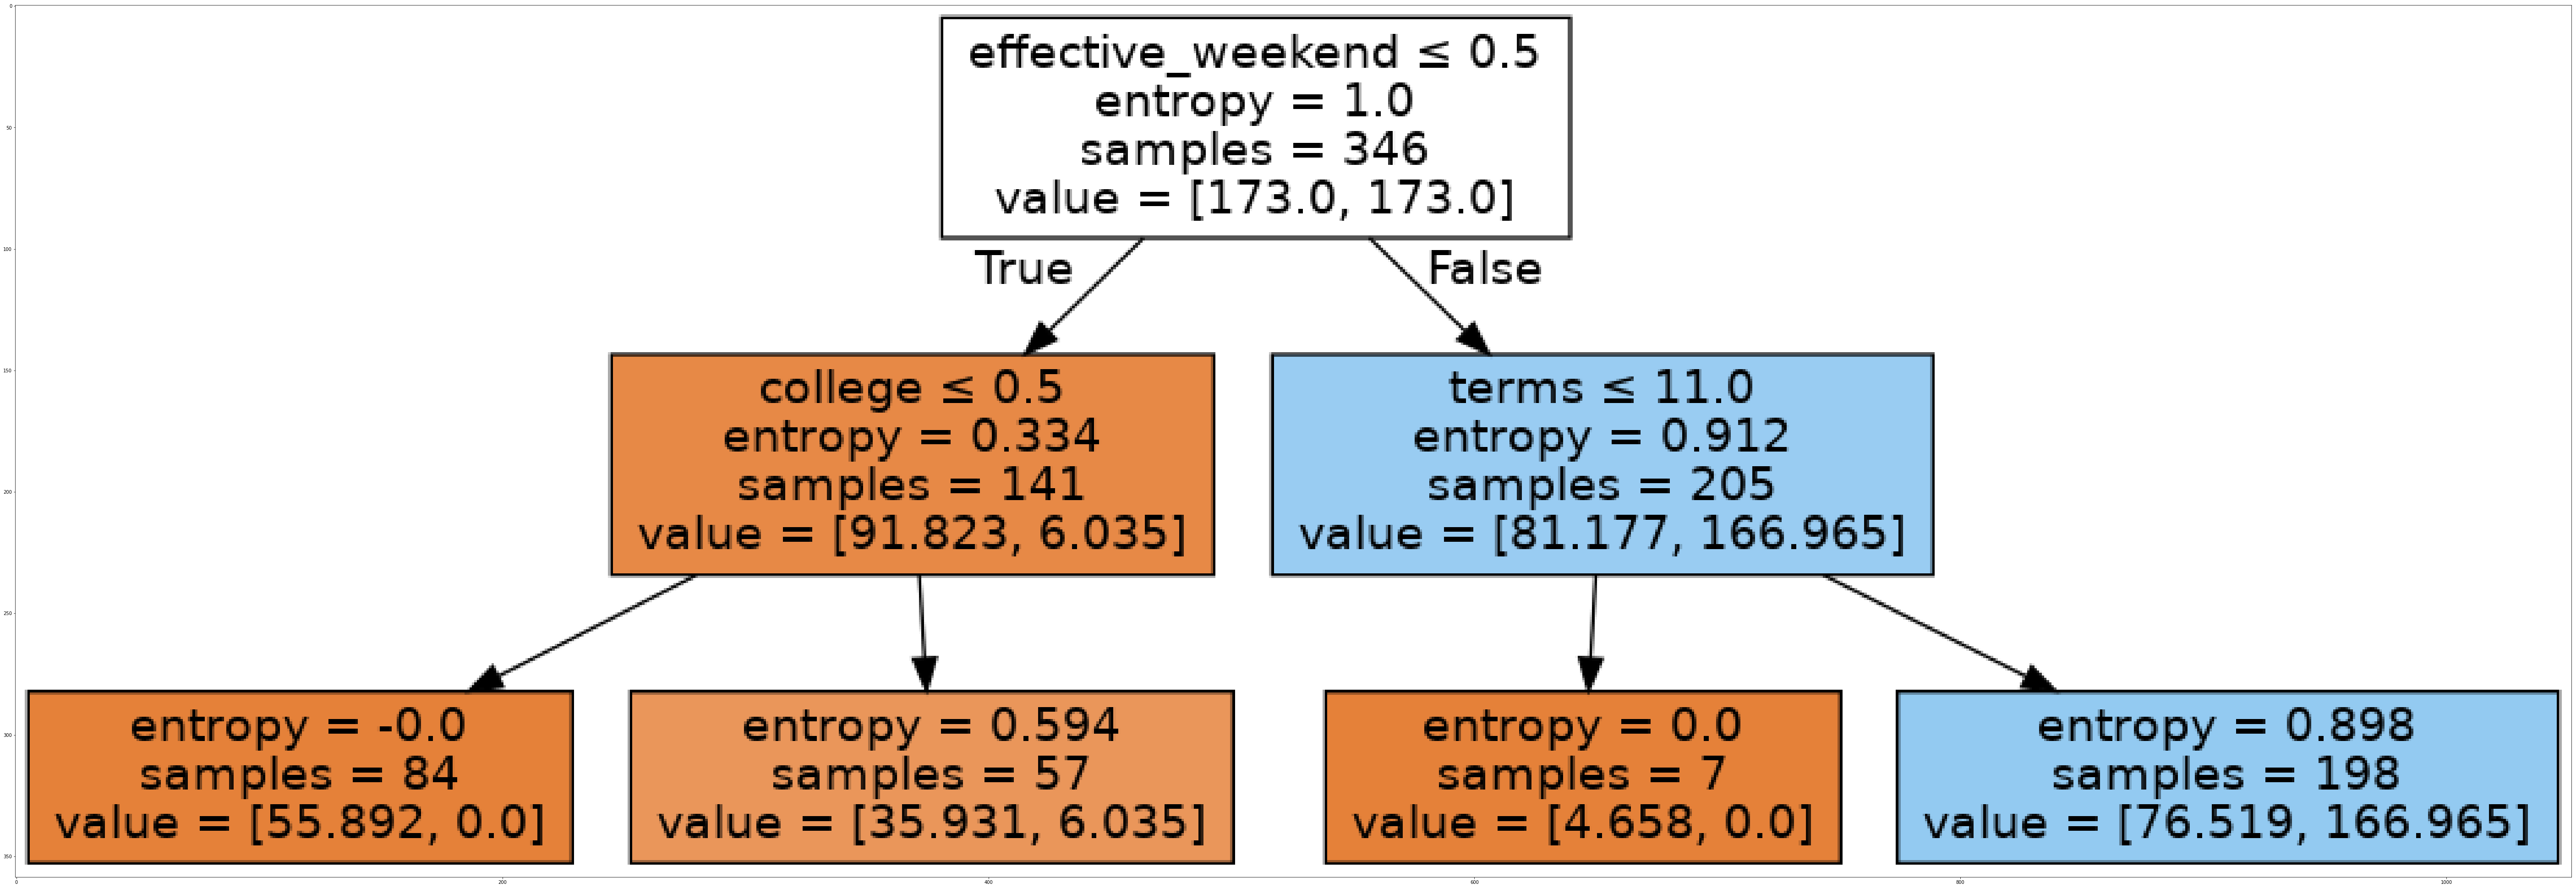

In [68]:
from sklearn.tree import DecisionTreeClassifier

#UndefinedMetricWarning - F1 Sometimes returns 0/0 and is regarded as 0, this is ok
@ignore_warnings(category=UndefinedMetricWarning)
def generate_optimal_tree(X, y):
    # Create a tree that will run our cv
    cv_tree = DecisionTreeClassifier(class_weight="balanced")
    pipe = Pipeline([('cv_tree', cv_tree)])

    # Create a dictionary of all the parameter options
    parameters = dict(cv_tree__min_samples_leaf=[1, 0.01, 0.02, 0.03],
                      cv_tree__max_depth=[2, 3, 4, 5],
                      cv_tree__criterion=["entropy", "gini"])

    # Conduct Parameter Optmization With Pipeline
    clf = GridSearchCV(pipe, parameters, scoring="f1", cv=5, iid=False)
    clf.fit(X, y)

    best_max_depth = clf.best_estimator_.get_params()['cv_tree__max_depth']
    best_min_samples_leaf = clf.best_estimator_.get_params()['cv_tree__min_samples_leaf']
    best_criterion = clf.best_estimator_.get_params()['cv_tree__criterion']
    print('Best max_depth:', best_max_depth)
    print('Best min_samples_leaf:', best_min_samples_leaf)
    print('Best criterion:', best_criterion)

    # No need to train_test_split as the GridSearchCV already did this internally when finding the best params
    loan_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth,
                                       min_samples_leaf=best_min_samples_leaf, class_weight="balanced")
    loan_tree.fit(X, y)
    return loan_tree

train_df = get_training_dataframe()
feature_set = ['effective_weekend',
               'Gender',
               'age',
               "Principal",
               "terms",
               'High School or Below', 'college', "Bechalor", "Master or Above",
               ]
X = train_df[feature_set]
# No need to scale for the tree, pointless
y = train_df['loan_status']

loan_tree = generate_optimal_tree(X, y)
plot_tree(X, loan_tree)

# Support Vector Machine

In [ ]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import itertools
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning, UndefinedMetricWarning
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

In [ ]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
def get_training_dataframe():
    return process_dataframe('loan_train.csv')


def get_test_dataframe():
    return process_dataframe("loan_test.csv")


def scale_columns(df, col_names):
    scaled_features = df.copy()
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features


def process_dataframe(file_name):
    df = pd.read_csv(file_name)
    # Convert binary parameters to ints
    df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
    df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1], inplace=True)

    # Unnamed:0 and 0.1 seem like running indexes with small holes in them, Use as customer id
    # Drop uneeded column, validated and is the same as Unnamed: 0
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
    df = df.rename(columns={"Unnamed: 0": "id"})

    # Convert dates to objects and extract weekend and month cycles
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['effective_weekend'] = df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)
    df['effective_week'] = df['effective_date'].dt.day.apply(lambda x: int(x/7)) # Doesnt seem important, here for symmetry
    df['effective_day'] = df['effective_date'].dt.day

    df['due_date'] = pd.to_datetime(df['due_date'])
    df['due_weekend'] = df['due_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)  # Doesnt seem important, here for symmetry
    df['due_week'] = df['due_date'].dt.day.apply(lambda x: int(x/7))
    df['due_day'] = df['due_date'].dt.day

    # dates are of no use anymore, remove to reduce visual clutter (manual inspection)
    df.drop(['due_date'], axis=1, inplace=True)
    df.drop(['effective_date'], axis=1, inplace=True)

    df = pd.concat([df, pd.get_dummies(df['terms'])], axis=1)
    df = df.rename(columns={7: "ShortLoan", 15: "MidLoan", 30: "LongLoan"})

    df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
    df['education'].replace(to_replace=['High School or Below', 'college',"Bechalor","Master or Above"], value=[0, 1, 2 ,3], inplace=True)

    return df

def plot_tree(df, tree_model):
    dot_data = StringIO()
    filename = "loan_tree.png"
    feature_names = df.columns
    tree.export_graphviz(tree_model, feature_names=feature_names, out_file=dot_data, filled=True, special_characters=True, rotate=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [69]:
from sklearn import svm

#UndefinedMetricWarning - F1 Sometimes returns 0/0 and is regarded as 0, this is ok
@ignore_warnings(category=UndefinedMetricWarning)
def generate_optimal_svm(X, y):
    cv_svm = svm.SVC(class_weight="balanced")
    pipe = Pipeline([('cv_svm', cv_svm)])

    # Create a dictionary of all the parameter options
    parameters = dict(cv_svm__kernel=['linear', 'poly', 'rbf', 'sigmoid'],
                      cv_svm__gamma=[0.001, 0.01, 0.1, 1],
                      cv_svm__C=[0.001, 0.01, 0.1, 1, 10])

    # Conduct Parameter Optmization With Pipeline
    clf = GridSearchCV(pipe, parameters, scoring="f1", cv=5, iid=False)
    clf.fit(X, y)

    best_kernel = clf.best_estimator_.get_params()['cv_svm__kernel']
    best_gamma = clf.best_estimator_.get_params()['cv_svm__gamma']
    best_c = clf.best_estimator_.get_params()['cv_svm__C']
    print('Best kerenl:', best_kernel)
    print('Best gamma:', best_gamma)
    print('Best c:', best_c)

    # No need to train_test_split as the GridSearchCV already did this internally when finding the best params
    loan_svm = svm.SVC(kernel=best_kernel, gamma=best_gamma, C=best_c, class_weight="balanced")
    loan_svm.fit(X, y)
    return loan_svm

train_df = get_training_dataframe()
feature_set = ['effective_weekend',
               'Gender',
               'age',
               "Principal",
               "terms",
               'High School or Below', 'college', "Bechalor", "Master or Above",
               ]
X = train_df[feature_set].astype('float64')
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = train_df['loan_status']

loan_svm = generate_optimal_svm(X, y)

Best kerenl: sigmoid
Best gamma: 0.1
Best c: 0.1


# Logistic Regression

In [ ]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import itertools
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning, UndefinedMetricWarning
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

In [ ]:
#This is part of the generic utils and is the exact same as in in all sections, added here for convenieance
def get_training_dataframe():
    return process_dataframe('loan_train.csv')


def get_test_dataframe():
    return process_dataframe("loan_test.csv")


def scale_columns(df, col_names):
    scaled_features = df.copy()
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[col_names] = features
    return scaled_features


def process_dataframe(file_name):
    df = pd.read_csv(file_name)
    # Convert binary parameters to ints
    df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
    df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1], inplace=True)

    # Unnamed:0 and 0.1 seem like running indexes with small holes in them, Use as customer id
    # Drop uneeded column, validated and is the same as Unnamed: 0
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
    df = df.rename(columns={"Unnamed: 0": "id"})

    # Convert dates to objects and extract weekend and month cycles
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['effective_weekend'] = df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)
    df['effective_week'] = df['effective_date'].dt.day.apply(lambda x: int(x/7)) # Doesnt seem important, here for symmetry
    df['effective_day'] = df['effective_date'].dt.day

    df['due_date'] = pd.to_datetime(df['due_date'])
    df['due_weekend'] = df['due_date'].dt.dayofweek.apply(lambda x: 1 if (x > 3) else 0)  # Doesnt seem important, here for symmetry
    df['due_week'] = df['due_date'].dt.day.apply(lambda x: int(x/7))
    df['due_day'] = df['due_date'].dt.day

    # dates are of no use anymore, remove to reduce visual clutter (manual inspection)
    df.drop(['due_date'], axis=1, inplace=True)
    df.drop(['effective_date'], axis=1, inplace=True)

    df = pd.concat([df, pd.get_dummies(df['terms'])], axis=1)
    df = df.rename(columns={7: "ShortLoan", 15: "MidLoan", 30: "LongLoan"})

    df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
    df['education'].replace(to_replace=['High School or Below', 'college',"Bechalor","Master or Above"], value=[0, 1, 2 ,3], inplace=True)

    return df

def plot_tree(df, tree_model):
    dot_data = StringIO()
    filename = "loan_tree.png"
    feature_names = df.columns
    tree.export_graphviz(tree_model, feature_names=feature_names, out_file=dot_data, filled=True, special_characters=True, rotate=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression

#FitFailedWarning - ignore on purpose becausae part of the gridsearch has incompatible types together (i.e newton-cg & l1)
#ConvergenceWarning - Happens only a few times, increasing max_iter drastically (10K) still doesnt help
#UndefinedMetricWarning - F1 Sometimes returns 0/0 and is regarded as 0, this is ok
@ignore_warnings(category=(FitFailedWarning, ConvergenceWarning, UndefinedMetricWarning))
def generate_optimal_log_reg(X, y):
    cv_log_reg = LogisticRegression(class_weight="balanced", max_iter=1000)
    pipe = Pipeline([('cv_log_reg', cv_log_reg)])

    # Create a dictionary of all the parameter options
    parameters = dict(cv_log_reg__penalty=['l1', 'l2'],
                      cv_log_reg__solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      cv_log_reg__C=[0.001, 0.01, 0.1, 1, 10])

    # Conduct Parameter Optmization With Pipeline
    clf = GridSearchCV(pipe, parameters, scoring="f1", cv=5, iid=False, error_score=np.nan)
    clf.fit(X, y)

    best_penalty = clf.best_estimator_.get_params()['cv_log_reg__penalty']
    best_solver = clf.best_estimator_.get_params()['cv_log_reg__solver']
    best_c = clf.best_estimator_.get_params()['cv_log_reg__C']
    print('Best penalty:', best_penalty)
    print('Best solver:', best_solver)
    print('Best c:', best_c)

    # No need to train_test_split as the GridSearchCV already did this internally when finding the best params
    loan_log_reg = LogisticRegression(penalty=best_penalty, solver=best_solver, C=best_c, class_weight="balanced", max_iter=100)
    loan_log_reg.fit(X, y)
    return loan_log_reg

train_df = get_training_dataframe()
feature_set = ['effective_weekend',
               'Gender',
               'age',
               "Principal",
               "terms",
               'High School or Below', 'college', "Bechalor", "Master or Above",
               ]
X = train_df[feature_set].astype('float64')
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = train_df['loan_status']

loan_log_reg = generate_optimal_log_reg(X, y)

Best penalty: l1
Best solver: liblinear
Best c: 0.1


# Model Evaluation using Test set

In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [71]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-04-06 20:39:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-04-06 20:39:49 (356 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [47]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [72]:
def validate_accuracy(tag, y_test, yhat, yhat_prob = None):
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)', 'COLLECTION(1)'], title=tag)

    print("%s: Jaccard Acc: %.2f" % (tag, metrics.jaccard_similarity_score(y_test, yhat)))
    print("%s: F1 Acc: %.2f " % (tag, metrics.f1_score(y_test, yhat)))
    if yhat_prob is not None:
        print("%s: LogLoss Acc: %.2f " % (tag, log_loss(y_test, yhat_prob)))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


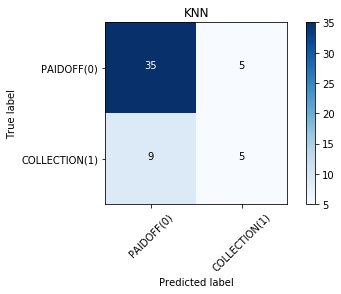

KNN: Jaccard Acc: 0.74
KNN: F1 Acc: 0.42 


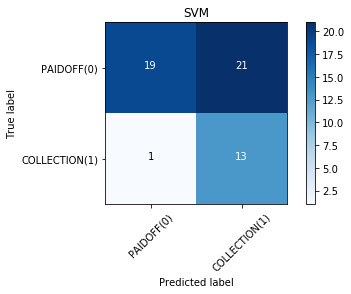

SVM: Jaccard Acc: 0.59
SVM: F1 Acc: 0.54 


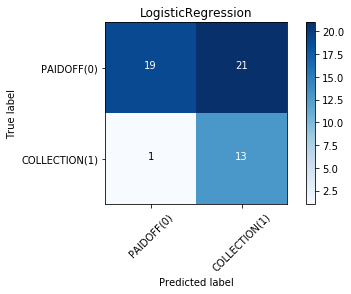

LogisticRegression: Jaccard Acc: 0.59
LogisticRegression: F1 Acc: 0.54 
LogisticRegression: LogLoss Acc: 0.60 


In [73]:
# Test via test set
test_df = get_test_dataframe()
X_test = test_df[feature_set].astype('float64')
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
y_test = test_df['loan_status'].values

#KNN
yhat = loan_knn.predict(X_test)
validate_accuracy("KNN", y_test, yhat)

#SVM
yhat = loan_svm.predict(X_test)
validate_accuracy("SVM", y_test, yhat)

#LogReg
yhat = loan_log_reg.predict(X_test)
yhat_prob = loan_log_reg.predict_proba(X_test)
validate_accuracy("LogisticRegression", y_test, yhat, yhat_prob)

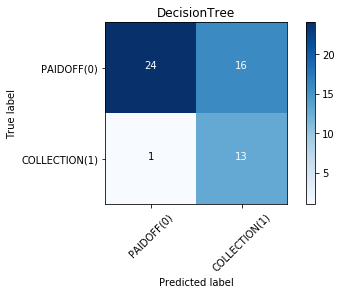

DecisionTree: Jaccard Acc: 0.69
DecisionTree: F1 Acc: 0.60 


In [74]:
#Same as others just tree doesnt need scaling
test_df = get_test_dataframe()
X_test = test_df[feature_set]
y_test = test_df['loan_status'].values
yhat = loan_tree.predict(X_test)

validate_accuracy("DecisionTree", y_test, yhat)

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          |     Jaccard    |   F1-score   |    LogLoss   |
|--------------------|----------------|--------------|--------------|
| KNN                |     0.74       |     0.42     |      NA      |
| Decision Tree      |     0.69       |     0.60     |      NA      |
| SVM                |     0.59       |     0.54     |      NA      |
| LogisticRegression |     0.59       |     0.54     |     0.60     |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>